# Arctic Monkeys - Do I Wanna Know

In [1]:
import numpy
import math
import wave
import sys 
import pygame
from pygame.locals import *

# Constants (can be changed)
number_of_bars = 1000             
height_of_bars = 600                     
width_of_bars = 2                      
fps = 15                                 # frames per second.

name_of_script = sys.argv[0]             # command line argument that retrives script being executed
status = 'stopped'                       # current playback status
frame_rate_clock = pygame.time.Clock()   # pygame clock object that controls frame rate.

pygame.init()                            # Initializes the pygame library                    
pygame.mixer.init()                      # Initializes the pygame mixer module which works with sounds

display_surface = pygame.display.set_mode([number_of_bars * width_of_bars, 50 + height_of_bars])
pygame.display.set_caption('Music Visualizer')
my_font = pygame.font.SysFont('Arial', 20)
pygame.mixer.music.load("Do_I_Wanna_Know.wav")

pygame.mixer.music.play()
pygame.mixer.music.set_endevent()
status = "Playing"

#process wave data (ONLY change first line)                      
f = wave.open("Do_I_Wanna_Know.wav", 'rb')                                       # Opens wav file 
parameters = f.getparams()                                                       # Retrieves parameters from the file
nchannels, sampwidth, framerate, nframes = parameters[:4]                        # Unpacks those parameters
string_data = f.readframes(nframes)                                              # Reads the audio data from file as a string
f.close()                                                                        # Closes the file
wave_data = numpy.fromstring(string_data, dtype = numpy.short)                   # Converts string into a 16-bit numpy array with each element in the array representing the amplitude at a point in time
wave_data.shape = -1, 2                                                          # Reshapes array into a 2D array with two columns.
wave_data = wave_data.T                                                          # Inverts the array so that each row corresponds to a channel and each column to a point in time.

number_of_frames = nframes                                                       # variable containing parameters to be used later

# Numerical Softening Using low-pass filter (ONLY change alpha between 0.0-0.5)
def smooth_waveform(audio_parameter, alpha=0.2):                                 # 'audio_parameter' represents the amplitude/time. 'alpha' is a low-pass filter which is to be kept at or below 0.5 for optimal smoothing. A smaller alpha will result in better smoothing.
    smoothed_data = [audio_parameter[0]]                                         # List that will store smoothed values

    for i in range(1, len(audio_parameter)):                                     # Function starts with the first value of the input audio_parameter and iterates through the rest of the values. For each value, it calculates a new smoothed value based on the previous smoothed value and the current audio parameter value
        smoothed_value = alpha * smoothed_data[-1] + (1 - alpha) * audio_parameter[i]
        smoothed_data.append(smoothed_value)

    return smoothed_data

# Visualizer (ONLY change 'scaling factor')
def Visualizer(number_of_frames):
    number_of_frames = int(number_of_frames)                                                                     # This parameter represents the current position in the audio file, and it is converted to an integer (number_of_frames) for further processing.
    audio_parameter = wave_data[0][nframes - number_of_frames:nframes - number_of_frames + number_of_bars]       # Variable that extracts a segment of the audio waveform (wave_data[0]) based on the current position (number_of_frames) and the specified number of bars.

    # Smooth the waveform using a low-pass filter
    smoothed_data = smooth_waveform(audio_parameter)                                                             #  function, which applies a low-pass filter to reduce high-frequency noise in the waveform.

    # Decrease the height by multiplying with a scaling factor (e.g., 0.5)
    scaling_factor = 0.01                                                                                         # Applied to the smoothe data to control height of the bars 
    scaled_data = [min(height_of_bars, int(i * height_of_bars * scaling_factor / 400)) for i in smoothed_data]   # Sets the height of the bars
    draw_bars(scaled_data)                                                # Uses the scaled data to render the bars on the screen

def vis(status):
    global number_of_frames
    if status == "stopped":
        number_of_frames = nframes
        return
    elif status == "paused":
        Visualizer(number_of_frames)
    else:
        number_of_frames -= framerate / fps
        if number_of_frames > 0:
            Visualizer(number_of_frames)

def get_time():
    seconds = max(0, pygame.mixer.music.get_pos() / 1000)
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    hms = ("%02d:%02d:%02d" % (h, m, s))
    return hms

def draw_bars(h):
    bars = []
    for i in h:
        bars.append([len(bars) * width_of_bars , 50 + height_of_bars - i, width_of_bars - 1, i])
    for i in bars:
        pygame.draw.rect(display_surface, [66,152,186], i, 0)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            sys.exit()
        elif event.type == KEYDOWN:
            if status == "stopped":
                if event.key == K_RETURN:
                    pygame.mixer_music.play()
                    status = "playing"
            elif status == "paused":
                if event.key == K_RETURN:
                    pygame.mixer_music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.unpause()
                    status = "playing"
            elif status == "playing":
                if event.key == K_RETURN:
                    pygame.mixer.music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.pause()
                    status = "paused"

    if number_of_frames <= 0:
        status = "stopped"

    name = my_font.render(name_of_script, True, (255,255,255))
    info = my_font.render(status.upper() + "" + get_time(), True, (255,255,255))
    display_surface.fill((0,0,0))    #color of the screen. used as bars here
    display_surface.blit(name,(0,0)) #Draws one surface on top of another
    display_surface.blit(info,(0, 18))
    frame_rate_clock.tick(fps)
    vis(status)
    pygame.display.update()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_25846/2912257367.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = numpy.fromstring(string_data, dtype = numpy.short)                   # Converts string into a 16-bit numpy array with each element in the array representing the amplitude at a point in time


SystemExit: 

/Users/manny/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
quit

# Do I Wanna Know (FFT)

In [1]:
import numpy
import math
import wave
import sys 
import pygame
from pygame.locals import *
from scipy.fft import fft

number_of_bars = 750 # number of bars
height_of_bars = 600 # height of bars
width_of_bars = 5 # width of bars
FPS = 15 # MAKE THIS SMOOTH

name_of_script = sys.argv[0]
status = 'stopped'
frame_rate_clock = pygame.time.Clock()

#screen init, music playback
pygame.init()
pygame.mixer.init()

display_surface = pygame.display.set_mode([number_of_bars * width_of_bars, 50 + height_of_bars])
pygame.display.set_caption('Music Visualizer')
my_font = pygame.font.SysFont('Arial', 20)
pygame.mixer.music.load("Do_I_Wanna_Know.wav")

pygame.mixer.music.play()
pygame.mixer.music.set_endevent()
status = "Playing"

#process wave data
f = wave.open("Do_I_Wanna_Know.wav", 'rb')
parameters = f.getparams()
nchannels, sampwidth, framerate, nframes = parameters[:4]
string_data = f.readframes(nframes)
f.close()
wave_data = numpy.fromstring(string_data, dtype = numpy.short)
wave_data.shape = -1, 2
wave_data = wave_data.T

number_of_frames = nframes

def smooth_waveform(audio_parameter, alpha=0.5):
    smoothed_data = [audio_parameter[0]]  # Start with the first value

    for i in range(1, len(audio_parameter)):
        smoothed_value = alpha * smoothed_data[-1] + (1 - alpha) * audio_parameter[i]
        smoothed_data.append(smoothed_value)

    return smoothed_data

def Visualizer(number_of_frames):
    number_of_frames = int(number_of_frames)
    audio_parameter = wave_data[0][nframes - number_of_frames:nframes - number_of_frames + number_of_bars]

     # Apply Fourier transform to get frequency components
    frequency_components = fft(audio_parameter)

    # Calculate magnitude spectrum
    magnitude_spectrum = numpy.abs(frequency_components)[:number_of_bars // 1]

    # Normalize the magnitude spectrum
    normalized_spectrum = magnitude_spectrum / max(magnitude_spectrum)

    draw_bars(normalized_spectrum)
    

def vis(status):
    global number_of_frames
    if status == "stopped":
        number_of_frames = nframes
        return
    elif status == "paused":
        Visualizer(number_of_frames)
    else:
        number_of_frames -= framerate / FPS
        if number_of_frames > 0:
            Visualizer(number_of_frames)

def get_time():
    seconds = max(0, pygame.mixer.music.get_pos() / 1000)
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    hms = ("%02d:%02d:%02d" % (h, m, s))
    return hms

def draw_bars(h):
    bars = []
    for i in h:
        bars.append([len(bars) * width_of_bars, 50 + height_of_bars - i * height_of_bars, width_of_bars - 1, i * height_of_bars])
    for i in bars:
        pygame.draw.rect(display_surface, [66,152,186], i, 0)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            sys.exit()
        elif event.type == KEYDOWN:
            if status == "stopped":
                if event.key == K_RETURN:
                    pygame.mixer_music.play()
                    status = "playing"
            elif status == "paused":
                if event.key == K_RETURN:
                    pygame.mixer_music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.unpause()
                    status = "playing"
            elif status == "playing":
                if event.key == K_RETURN:
                    pygame.mixer.music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.pause()
                    status = "paused"
    if number_of_frames <= 0:
        status = "stopped"

    name = my_font.render(name_of_script, True, (255,255,255))
    info = my_font.render(status.upper() + "" + get_time(), True, (255,255,255))
    display_surface.fill((0,0,0))    #color of the screen. used as bars here
    display_surface.blit(name,(0,0)) #Draws one surface on top of another
    display_surface.blit(info,(0, 18))
    frame_rate_clock.tick(FPS)
    vis(status)
    pygame.display.update()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_25956/947390706.py:39: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = numpy.fromstring(string_data, dtype = numpy.short)
/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_25956/947390706.py:65: RuntimeWarning: invalid value encountered in divide
  normalized_spectrum = magnitude_spectrum / max(magnitude_spectrum)


SystemExit: 

/Users/manny/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
quit

# Plots for Data Analysis

For a fast Fourier transform of a frequency versus amplitude plot:

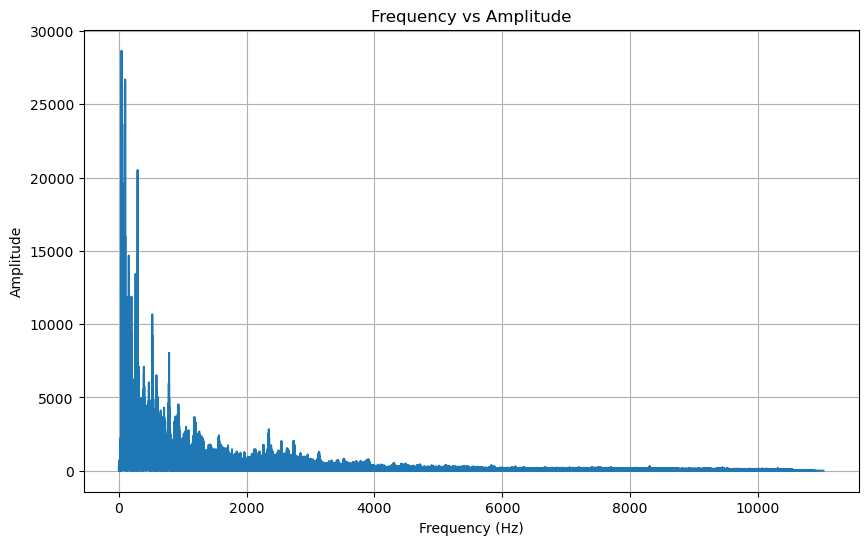

In [2]:
from IPython.display import Audio, display
import matplotlib.pyplot as plt
import numpy as np
import librosa as lb
import librosa.display

# Load the audio file
audio_path = '/Users/manny/Computational Methods In Physics/Final Project/do_i_wanna_know.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path)

# Perform FFT to get the frequency domain representation
fft_result = np.fft.fft(y)
magnitude_spectrum = np.abs(fft_result)[:len(fft_result)//2] 
frequencies = np.fft.fftfreq(len(fft_result), 1/sr)[:len(fft_result)//2]

# Plot frequency vs amplitude
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude_spectrum)
plt.title('Frequency vs Amplitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

For a time vs time versus amplitude:

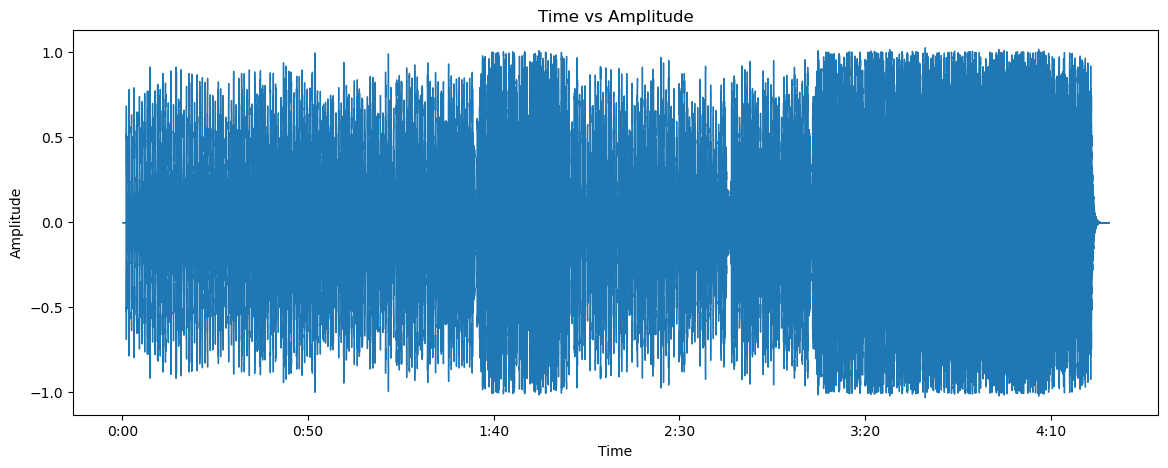

In [3]:
x, sr = librosa.load('/Users/manny/Computational Methods In Physics/Final Project/do_i_wanna_know.wav') # line needed to get step 5 to run. DO NOT CHANGE

%matplotlib inline

plt.figure(figsize=(14, 5))
plt.title('Time vs Amplitude')
plt.xlabel('Time')
plt.ylabel('Amplitude')
librosa.display.waveshow(x, sr=sr)